# LSTM Regression Model on Google Stocks and News Sentiment

Sources: 
- https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/
- https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
- https://www.google.com/search?client=firefox-b-1-d&q=stationarity+of+time+series

Table of Contents:
- <a href='#sectionA'> Baseline Model: No News Sentiment Features</a>
    - <a href='#section1'>Data Preprocessing</a>
        - <a href='#section1a'>Visualizing Data</a>
        - <a href='#section1b'>Removes News Sentiment Features</a>
        - <a href='#section1c'>Splitting Data</a>
        - <a href='#section1d'>Scaling Data</a>
        - <a href='#section1e'>Creating Time Series Data</a>
    - <a href='#section2'>Creating and Training LSTM Model using Keras</a>
        - <a href='#section2a'>Model Performance</a>
    - <a href='#section3'>Analyzing Results</a>
- <a href='#sectionB'> New Model: News Sentiment and Stock Predictions </a>
    - <a href='#sectionB1'>Data Preprocessing</a>
        - <a href='#sectionB1a'>Visualizing Data</a>
        - <a href='#sectionB1b'>Splitting Data</a>
        - <a href='#sectionB1c'>Scaling Data</a>
        - <a href='#sectionB1d'>Creating Time Series Data</a>
    - <a href='#sectionB2'>Creating and Training LSTM Model using Keras</a>
        - <a href='#sectionB2a'>Model Performance</a>
    - <a href='#sectionB3'>Analyzing Results</a>
    - <a href='#sectionB4'>Hyper Parameter Tuning</a>
- <a href='#sectionC'>Choosing the Best Model and Testing Results!</a>

# Baseline Model: No News Sentiment Features<a id='sectionA'></a>

## Data Preprocessing<a id='section1'></a>
- Computing target feature 'middle' = ('high' + 'low') / 2

In [253]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/news_sentiment_augmented_google.csv').drop(['Unnamed: 0'], axis=1)
df['Middle'] = (df['Low'] + df['High']) / 2
df

,Date,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,2013-01-07,0.101266,0.088608,0.113924,0.050633,0.455696,0.113924,0.480690,0.176541,0.052167,...,0.329081,0.176808,2004.556962,367.72,369.69,365.29,367.38,3311534,0,367.490
1,2013-01-08,0.083333,0.166667,0.083333,0.000000,0.416667,0.166667,0.455641,0.161938,0.048414,...,0.338889,0.102778,1493.583333,367.77,368.15,362.22,366.65,3352074,0,365.185
2,2013-01-09,0.134831,0.191011,0.112360,0.033708,0.235955,0.123596,0.467116,0.145615,0.046497,...,0.385071,0.159139,2536.303371,366.50,369.18,364.30,369.06,4051302,0,366.740
3,2013-01-10,0.125000,0.187500,0.200000,0.012500,0.237500,0.062500,0.462260,0.156578,0.047305,...,0.389721,0.096425,2085.200000,371.42,372.50,366.75,370.74,3671560,0,369.625
4,2013-01-11,0.098039,0.137255,0.078431,0.058824,0.333333,0.156863,0.480836,0.166839,0.043516,...,0.329093,0.186686,3621.843137,371.00,371.22,368.15,370.00,2570250,0,369.685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2014-12-19,0.067568,0.121622,0.121622,0.040541,0.081081,0.432432,0.349775,0.093596,0.029660,...,0.340203,0.138859,2476.770270,516.99,520.81,508.86,520.04,4872059,0,514.835
494,2014-12-22,0.097222,0.097222,0.125000,0.013889,0.083333,0.319444,0.384586,0.092461,0.029623,...,0.335687,0.181722,2348.555556,520.61,532.97,520.59,532.30,3319461,0,526.780
495,2014-12-23,0.049180,0.163934,0.032787,0.016393,0.131148,0.377049,0.377784,0.065058,0.030542,...,0.316924,0.136902,2862.983607,534.51,542.30,533.72,538.77,2877208,0,538.010
496,2014-12-24,0.057692,0.115385,0.076923,0.057692,0.115385,0.423077,0.352430,0.079892,0.027218,...,0.363923,0.132746,3544.038462,538.82,540.29,535.10,536.93,737848,0,537.695


## Visualize the Data<a id='section1a'></a>

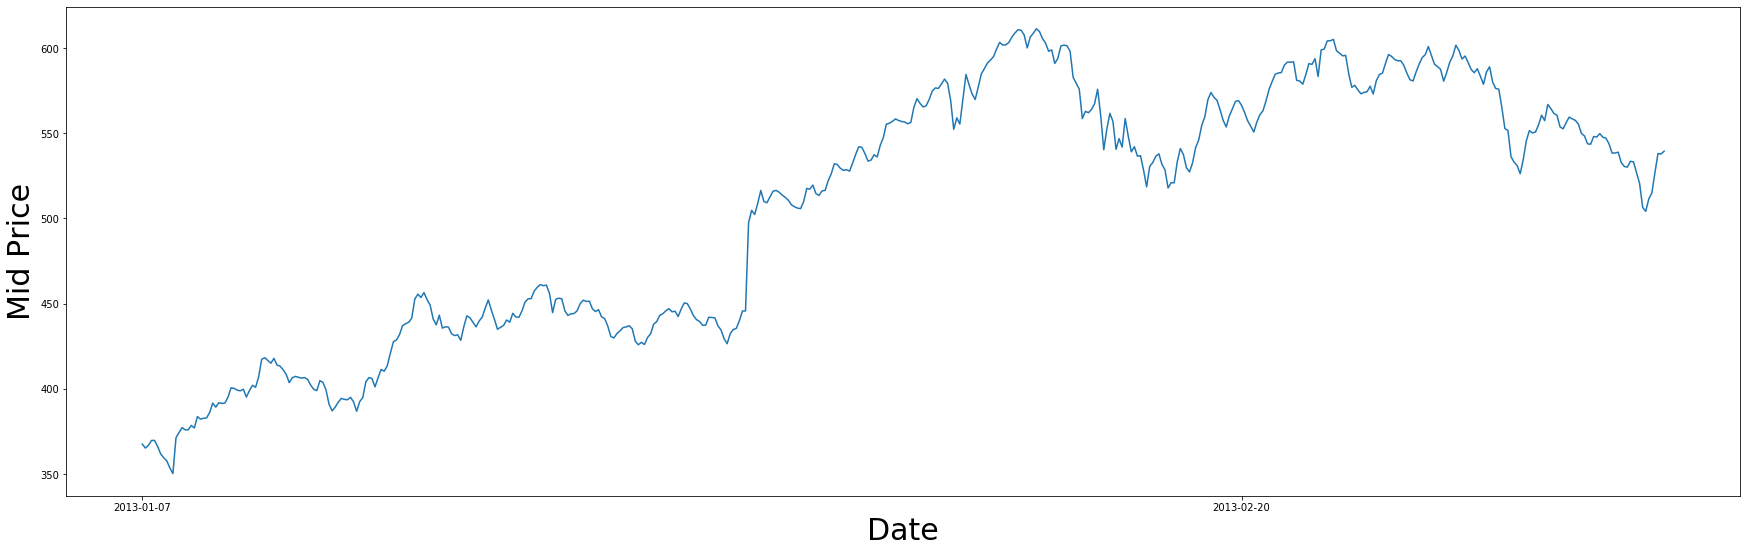

In [254]:
plt.figure(figsize = (30,9))
plt.plot(range(df.shape[0]), df['Middle'])
plt.xticks(range(0, df.shape[0], 359), df['Date'].loc[::30])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.show()

## Remove News Sentiment Features<a id='section1b'></a>

In [255]:
df = df[['shares', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'Middle']]
df.head()

,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,2004.556962,367.72,369.69,365.29,367.38,3311534,0,367.490
1,1493.583333,367.77,368.15,362.22,366.65,3352074,0,365.185
2,2536.303371,366.50,369.18,364.30,369.06,4051302,0,366.740
3,2085.200000,371.42,372.50,366.75,370.74,3671560,0,369.625
4,3621.843137,371.00,371.22,368.15,370.00,2570250,0,369.685


## Splitting Data<a id='section1c'></a>
- 80%, 20%, 20% split

In [256]:
from sklearn.preprocessing import MinMaxScaler

def split_scale(df):
    training_data = df[:300]
    validation_data = df[300:400]
    testing_data = df[400:]
    
    sc = MinMaxScaler(feature_range = (0, 1))
    return (pd.DataFrame(sc.fit_transform(training_data), columns=training_data.columns, dtype='float64'), 
            pd.DataFrame(sc.transform(validation_data), columns=validation_data.columns, dtype='float64'),
            pd.DataFrame(sc.transform(testing_data), columns=testing_data.columns, dtype='float64'), 
            sc)

## Scaling Data<a id='section1d'></a>
- Applying MinMaxScaler over all features
- Note only fitting on training_data to prevent fitting on validation

In [257]:
(training_data_scaled, validation_data_scaled, testing_data_scaled, sc) = split_scale(df)

training_data_scaled

,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,0.032107,0.058995,0.065019,0.067026,0.061630,0.084954,0.0,0.066194
1,0.000000,0.059187,0.059136,0.055288,0.058808,0.086823,0.0,0.057362
2,0.065519,0.054318,0.063071,0.063241,0.068126,0.119051,0.0,0.063320
3,0.037174,0.073178,0.075754,0.072608,0.074621,0.101548,0.0,0.074375
4,0.133728,0.071568,0.070864,0.077961,0.071760,0.050788,0.0,0.074605
...,...,...,...,...,...,...,...,...
295,0.219141,0.974393,0.972189,0.958018,0.961027,0.090454,0.0,0.967621
296,0.029149,0.938475,0.959812,0.934236,0.975139,0.113638,0.0,0.949497
297,0.069501,0.964657,0.964893,0.935306,0.939878,0.148548,0.0,0.952582
298,0.092753,0.915130,0.927379,0.911906,0.908444,0.144505,0.0,0.922042


## Creating Time Series Data<a id='section1e'></a>
- Creating "pairs" of data based on look_back variable.
- look_back refers to how many consecutive data points behind current predicting data point to count

In [258]:
def create_dataset(dataset, target_feature, look_back=1):
    dataX, dataY = [], []
    for i in range(look_back, len(dataset)):
        past_data = []
        for past in range(look_back):
            a = dataset.drop([target_feature], axis=1).iloc[i - past - 1].values
            past_data.append(a)
        dataX.append(past_data)
        dataY.append(dataset.iloc[i][target_feature])
        
    return np.array(dataX), np.array(dataY)

In [259]:
look_back = 1
trainX, trainY = create_dataset(training_data_scaled, 'Middle', look_back=look_back)
valX, valY = create_dataset(validation_data_scaled, 'Middle', look_back=look_back)
testX, testY = create_dataset(testing_data_scaled, 'Middle', look_back=look_back)

In [260]:
num_feat = trainX.shape[2]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_feat))
valX = np.reshape(valX, (valX.shape[0], look_back, num_feat))
testX = np.reshape(testX, (testX.shape[0], look_back, num_feat))

## Creating and Training LSTM Model Using Keras<a id='section2'></a>

In [261]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(32, input_shape=(look_back, num_feat)))
model.add(Dense(1))

In [262]:
model.compile(loss='mean_squared_error', optimizer='adam')
epochs = 15
history = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=epochs, batch_size=4, verbose=2)

Epoch 1/15
75/75 - 0s - loss: 0.0630 - val_loss: 0.0060
Epoch 2/15
75/75 - 0s - loss: 0.0045 - val_loss: 0.0032
Epoch 3/15
75/75 - 0s - loss: 0.0019 - val_loss: 0.0010
Epoch 4/15
75/75 - 0s - loss: 8.2478e-04 - val_loss: 7.4480e-04
Epoch 5/15
75/75 - 0s - loss: 5.5716e-04 - val_loss: 7.3274e-04
Epoch 6/15
75/75 - 0s - loss: 5.0778e-04 - val_loss: 7.7486e-04
Epoch 7/15
75/75 - 0s - loss: 4.9879e-04 - val_loss: 8.6017e-04
Epoch 8/15
75/75 - 0s - loss: 4.8796e-04 - val_loss: 7.4581e-04
Epoch 9/15
75/75 - 0s - loss: 4.7052e-04 - val_loss: 8.0011e-04
Epoch 10/15
75/75 - 0s - loss: 4.6643e-04 - val_loss: 9.8456e-04
Epoch 11/15
75/75 - 0s - loss: 4.8331e-04 - val_loss: 7.5301e-04
Epoch 12/15
75/75 - 0s - loss: 4.5961e-04 - val_loss: 7.2967e-04
Epoch 13/15
75/75 - 0s - loss: 4.3826e-04 - val_loss: 8.3572e-04
Epoch 14/15
75/75 - 0s - loss: 4.4264e-04 - val_loss: 7.0831e-04
Epoch 15/15
75/75 - 0s - loss: 4.4435e-04 - val_loss: 7.3394e-04


## Model Performance<a id='section2a'></a>

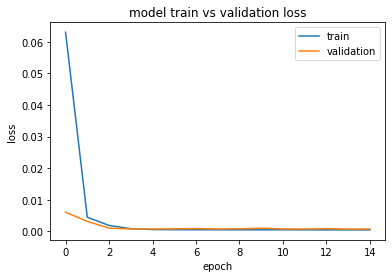

In [263]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [264]:
from keras.losses import MeanSquaredError
from sklearn.metrics import r2_score

def get_mse(model, X, y):
    mse = MeanSquaredError()
    return mse(y, model.predict(X))

def get_r2(model, X, y):    
    return r2_score(y, model.predict(X))

print('Training MSE: {:.2f}'.format(get_mse(model, trainX, trainY)))
print('Validation MSE: {:.2f}'.format(get_mse(model, valX, valY)))
print('Training r2: {:.2f}'.format(get_r2(model, trainX, trainY)))
print('Validation r2: {:.2f}'.format(get_r2(model, valX, valY)))

Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.91


## Analyzing Results <a id='section3'></a>

In [265]:
def getPredictions(model, scaled_features, input_features, target_feature, sc, look_back=1):
    scaled_training_results = model.predict(input_features)
    dummy_inputs = scaled_features.copy().iloc[look_back:]
    dummy_inputs[target_feature] = scaled_training_results
    
    results = sc.inverse_transform(dummy_inputs)
    unscaled_results = []
    for total in results:
        unscaled_results.append(total[len(total) - 1])
    
    return [None for _ in range(look_back)] + unscaled_results

In [266]:
no_news_trn_res = getPredictions(model, training_data_scaled, trainX, 'Middle', sc, look_back=look_back)

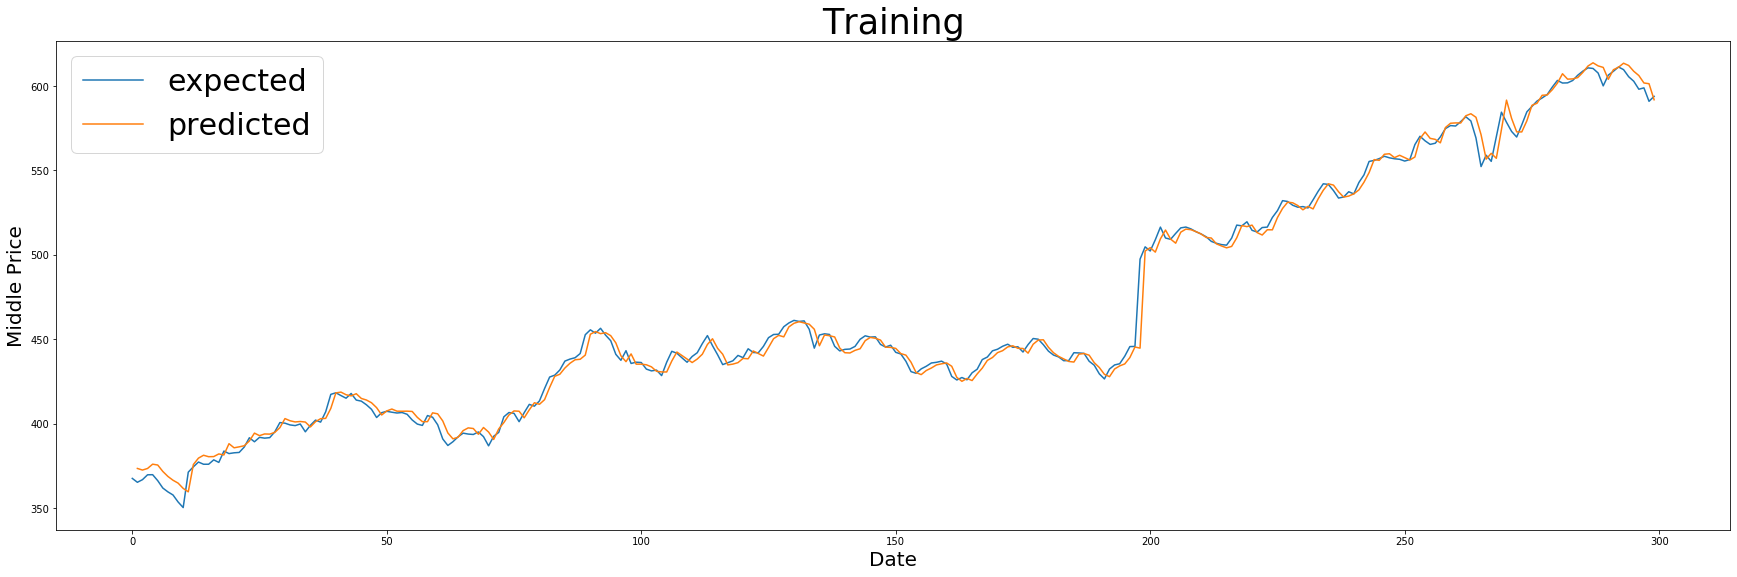

In [267]:
# Plot training data with known
plt.figure(figsize = (30,9))
plt.plot(range(df[:300].shape[0]), df[:300]['Middle'], label='expected')
plt.plot(range(len(no_news_trn_res)), no_news_trn_res, label='predicted')
plt.title('Training', fontsize=35)
plt.ylabel('Middle Price', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

In [268]:
no_news_val_res = getPredictions(model, validation_data_scaled, valX, 'Middle', sc, look_back=look_back)

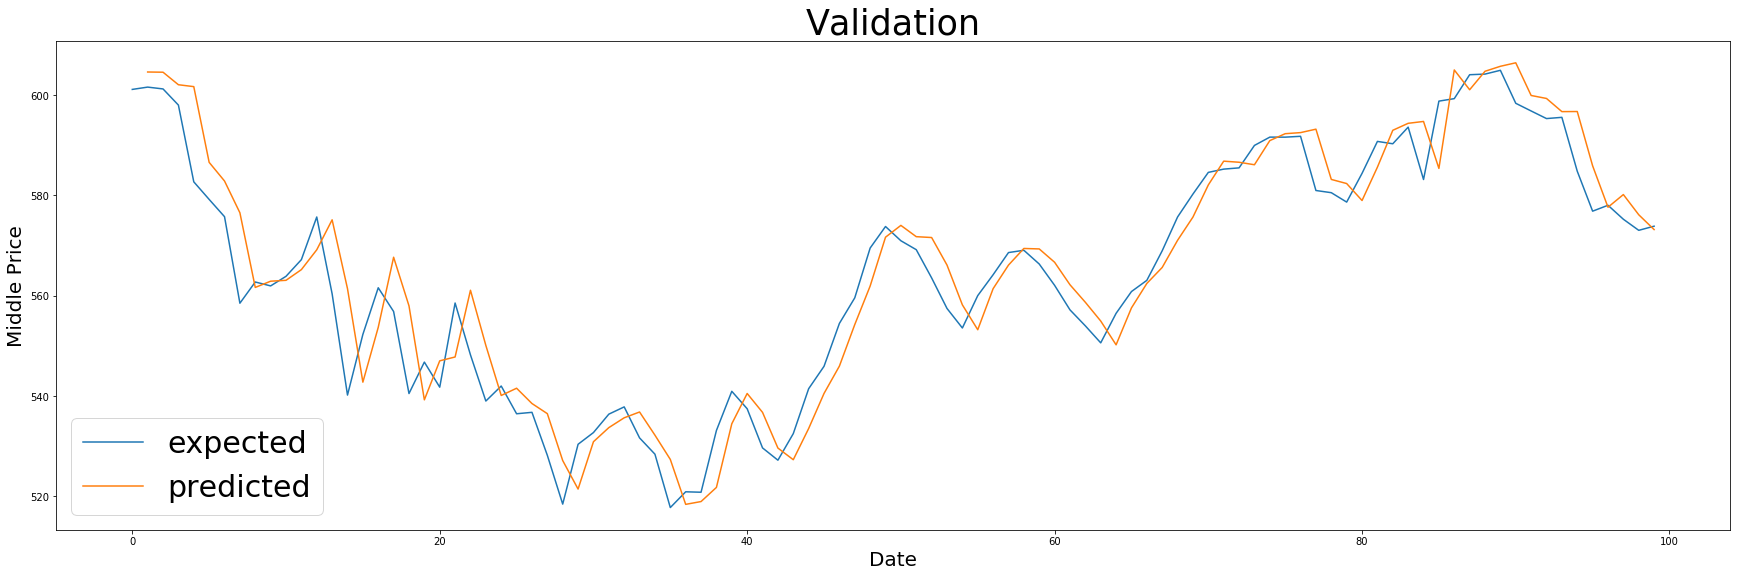

In [269]:
# Plot validation data with known
plt.figure(figsize = (30,9))
plt.plot(range(df[300:400].shape[0]), df[300:400]['Middle'], label='expected')
plt.plot(range(len(no_news_val_res)), no_news_val_res, label='predicted')
plt.title('Validation', fontsize=35)
plt.ylabel('Middle Price', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

In [270]:
total_expected = df[:400]
no_news_total_res = no_news_trn_res + no_news_val_res

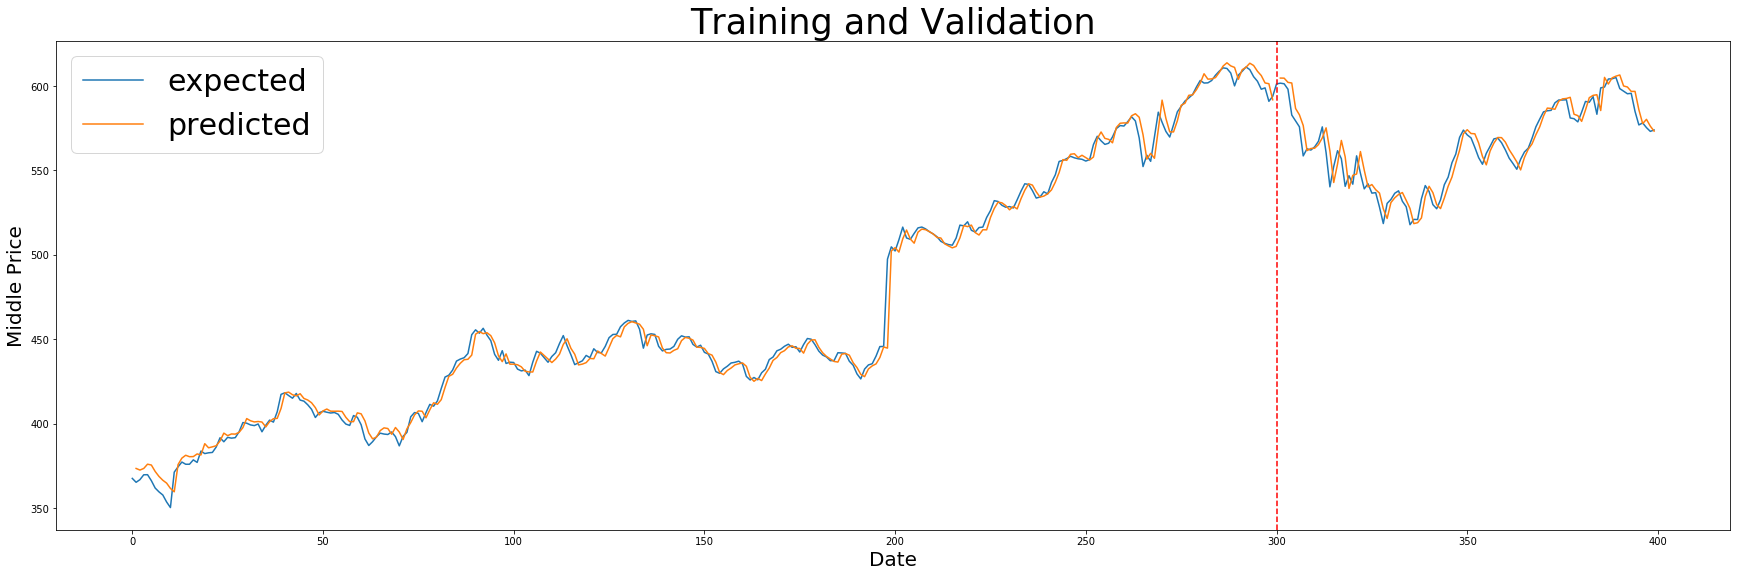

In [271]:
# Plot total data with known
plt.figure(figsize = (30,9))
plt.plot(range(total_expected.shape[0]), total_expected['Middle'], label='expected')
plt.plot(range(len(no_news_total_res)), no_news_total_res, label='predicted')
plt.title('Training and Validation', fontsize=35)
plt.ylabel('Middle Price', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.legend(prop={'size': 30})
plt.axvline(x=300, color='red', ls='--')
plt.show()

In [272]:
no_news_tst_res = getPredictions(model, testing_data_scaled, testX, 'Middle', sc, look_back=1)

print('Testing MSE: {:.2f}'.format(get_mse(model, testX, testY)))
print('Testing r2: {:.2f}'.format(get_r2(model, testX, testY)))

Testing MSE: 0.02
Testing r2: 0.96


# New Model: News Sentiment and Stock Predictions<a id='sectionB'></a>

## Data Preprocessing<a id='sectionB1'></a>
- Computing target feature 'middle' = ('high' + 'low') / 2

In [273]:
df = pd.read_csv('dataset/news_sentiment_augmented_google.csv').drop(['Unnamed: 0'], axis=1)

In [274]:
df['Middle'] = (df['Low'] + df['High']) / 2
df

,Date,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,2013-01-07,0.101266,0.088608,0.113924,0.050633,0.455696,0.113924,0.480690,0.176541,0.052167,...,0.329081,0.176808,2004.556962,367.72,369.69,365.29,367.38,3311534,0,367.490
1,2013-01-08,0.083333,0.166667,0.083333,0.000000,0.416667,0.166667,0.455641,0.161938,0.048414,...,0.338889,0.102778,1493.583333,367.77,368.15,362.22,366.65,3352074,0,365.185
2,2013-01-09,0.134831,0.191011,0.112360,0.033708,0.235955,0.123596,0.467116,0.145615,0.046497,...,0.385071,0.159139,2536.303371,366.50,369.18,364.30,369.06,4051302,0,366.740
3,2013-01-10,0.125000,0.187500,0.200000,0.012500,0.237500,0.062500,0.462260,0.156578,0.047305,...,0.389721,0.096425,2085.200000,371.42,372.50,366.75,370.74,3671560,0,369.625
4,2013-01-11,0.098039,0.137255,0.078431,0.058824,0.333333,0.156863,0.480836,0.166839,0.043516,...,0.329093,0.186686,3621.843137,371.00,371.22,368.15,370.00,2570250,0,369.685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2014-12-19,0.067568,0.121622,0.121622,0.040541,0.081081,0.432432,0.349775,0.093596,0.029660,...,0.340203,0.138859,2476.770270,516.99,520.81,508.86,520.04,4872059,0,514.835
494,2014-12-22,0.097222,0.097222,0.125000,0.013889,0.083333,0.319444,0.384586,0.092461,0.029623,...,0.335687,0.181722,2348.555556,520.61,532.97,520.59,532.30,3319461,0,526.780
495,2014-12-23,0.049180,0.163934,0.032787,0.016393,0.131148,0.377049,0.377784,0.065058,0.030542,...,0.316924,0.136902,2862.983607,534.51,542.30,533.72,538.77,2877208,0,538.010
496,2014-12-24,0.057692,0.115385,0.076923,0.057692,0.115385,0.423077,0.352430,0.079892,0.027218,...,0.363923,0.132746,3544.038462,538.82,540.29,535.10,536.93,737848,0,537.695


## Visualize the Data<a id='sectionB1a'></a>

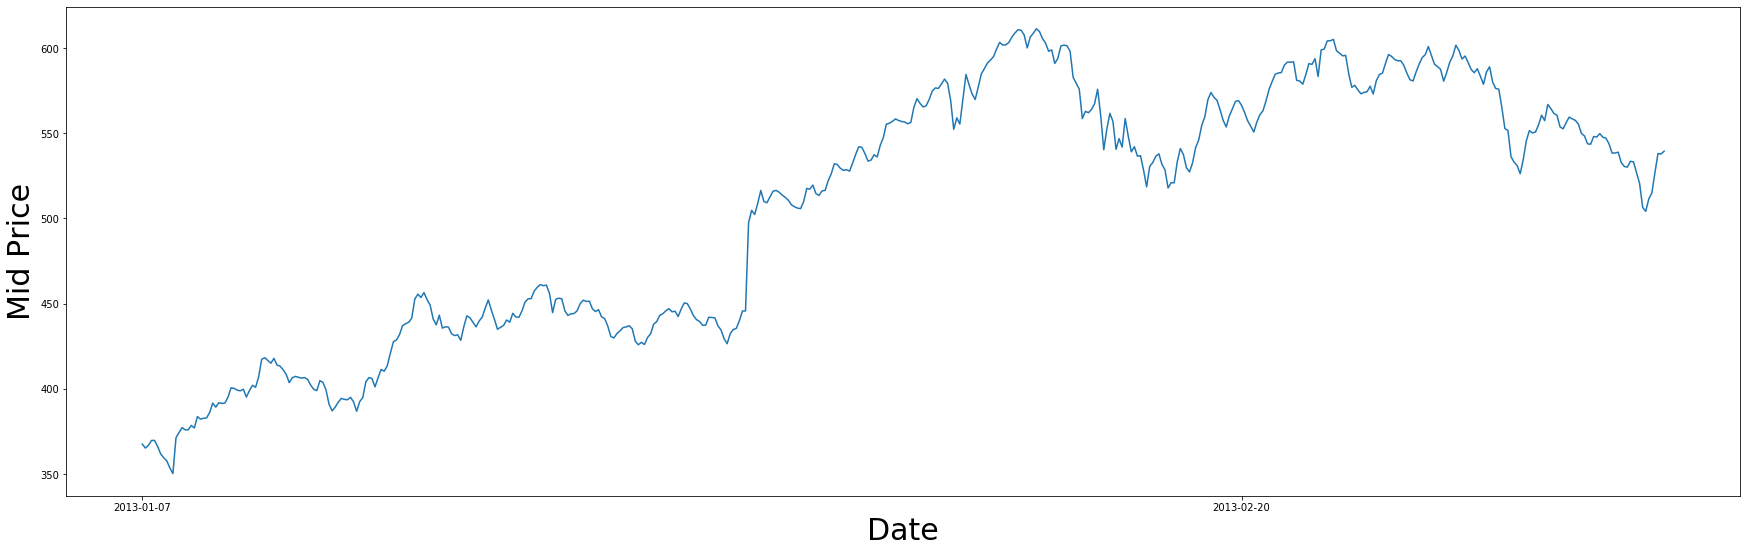

In [275]:
plt.figure(figsize = (30,9))
plt.plot(range(df.shape[0]), df['Middle'])
plt.xticks(range(0, df.shape[0], 359), df['Date'].loc[::30])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.show()

In [276]:
df = df.drop(['Date'], axis=1)

## Training, Validation, Testing Split<a id='sectionB1b'></a>
- 80%, 20%, 20% split

## Scaling Data<a id='sectionB1c'></a>
- Applying MinMaxScaler over all features
- Note only fitting on training_data to prevent fitting on validation

In [277]:
(training_data_scaled, validation_data_scaled, testing_data_scaled, sc) = split_scale(df)

training_data_scaled

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,0.543153,0.227605,0.197980,0.199553,0.787121,0.265384,0.801997,0.838543,1.000000,0.286567,...,0.591883,0.529864,0.032107,0.058995,0.065019,0.067026,0.061630,0.084954,0.0,0.066194
1,0.446970,0.512821,0.103237,0.000000,0.710903,0.404290,0.518249,0.697056,0.798920,0.219626,...,0.642715,0.143875,0.000000,0.059187,0.059136,0.055288,0.058808,0.086823,0.0,0.057362
2,0.723187,0.601772,0.193135,0.132849,0.358002,0.290855,0.648240,0.538887,0.696144,0.198793,...,0.882067,0.437738,0.065519,0.054318,0.063071,0.063241,0.068126,0.119051,0.0,0.063320
3,0.670455,0.588942,0.464567,0.049265,0.361019,0.129950,0.593227,0.645117,0.739473,0.433560,...,0.906167,0.110753,0.037174,0.073178,0.075754,0.072608,0.074621,0.101548,0.0,0.074375
4,0.525847,0.405354,0.088055,0.231834,0.548166,0.378470,0.803652,0.744541,0.536400,0.377849,...,0.591947,0.581366,0.133728,0.071568,0.070864,0.077961,0.071760,0.050788,0.0,0.074605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.259531,0.434243,0.144865,0.190702,0.369681,0.602523,0.449170,0.183346,0.356334,0.670336,...,0.479048,0.570092,0.219141,0.974393,0.972189,0.958018,0.961027,0.090454,0.0,0.967621
296,0.175857,0.502837,0.555957,0.129219,0.217357,0.656143,0.493522,0.186564,0.352439,0.599635,...,0.498946,0.382707,0.029149,0.938475,0.959812,0.934236,0.975139,0.113638,0.0,0.949497
297,0.167614,0.417668,0.377461,0.184743,0.324403,0.582611,0.363386,0.105685,0.190029,0.425558,...,0.716110,0.193989,0.069501,0.964657,0.964893,0.935306,0.939878,0.148548,0.0,0.952582
298,0.000000,0.190422,0.452421,0.231834,0.126965,0.430111,0.536312,0.256711,0.165015,0.429428,...,0.562241,0.822544,0.092753,0.915130,0.927379,0.911906,0.908444,0.144505,0.0,0.922042


## Creating Time Series Data<a id='sectionB1d'></a>
- Creating "pairs" of data based on look_back variable.
- look_back refers to how many consecutive data points behind current predicting data point to count

In [278]:
look_back = 1
trainX, trainY = create_dataset(training_data_scaled, 'Middle', look_back=look_back)
valX, valY = create_dataset(validation_data_scaled, 'Middle', look_back=look_back)
testX, testY = create_dataset(testing_data_scaled, 'Middle', look_back=look_back)

In [279]:
num_feat = trainX.shape[2]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_feat))
valX = np.reshape(valX, (valX.shape[0], look_back, num_feat))
testX = np.reshape(testX, (testX.shape[0], look_back, num_feat))

## Creating and Training LSTM Model Using Keras<a id='sectionB2'></a>

In [280]:
model = Sequential()
model.add(LSTM(32, input_shape=(look_back, num_feat)))
model.add(Dense(1))

In [281]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=epochs, batch_size=4, verbose=2)

Epoch 1/15
75/75 - 0s - loss: 0.0765 - val_loss: 0.0632
Epoch 2/15
75/75 - 0s - loss: 0.0144 - val_loss: 0.0045
Epoch 3/15
75/75 - 0s - loss: 0.0025 - val_loss: 0.0015
Epoch 4/15
75/75 - 0s - loss: 0.0014 - val_loss: 0.0012
Epoch 5/15
75/75 - 0s - loss: 0.0011 - val_loss: 9.6828e-04
Epoch 6/15
75/75 - 0s - loss: 8.9489e-04 - val_loss: 8.6612e-04
Epoch 7/15
75/75 - 0s - loss: 7.2895e-04 - val_loss: 8.8570e-04
Epoch 8/15
75/75 - 0s - loss: 6.6355e-04 - val_loss: 0.0011
Epoch 9/15
75/75 - 0s - loss: 5.7219e-04 - val_loss: 7.7687e-04
Epoch 10/15
75/75 - 0s - loss: 6.1585e-04 - val_loss: 7.8969e-04
Epoch 11/15
75/75 - 0s - loss: 5.1959e-04 - val_loss: 8.2647e-04
Epoch 12/15
75/75 - 0s - loss: 5.3805e-04 - val_loss: 7.4314e-04
Epoch 13/15
75/75 - 0s - loss: 4.6251e-04 - val_loss: 7.7060e-04
Epoch 14/15
75/75 - 0s - loss: 4.5965e-04 - val_loss: 7.1995e-04
Epoch 15/15
75/75 - 0s - loss: 5.1939e-04 - val_loss: 7.2329e-04


## Model Performance<a id='sectionB2a'></a>

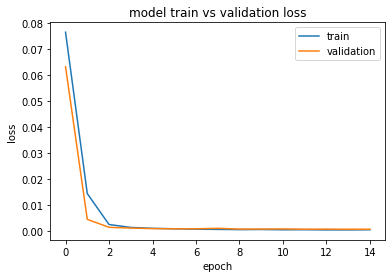

In [282]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [283]:
print('Training MSE: {:.2f}'.format(get_mse(model, trainX, trainY)))
print('Validation MSE: {:.2f}'.format(get_mse(model, valX, valY)))
print('Training r2: {:.2f}'.format(get_r2(model, trainX, trainY)))
print('Validation r2: {:.2f}'.format(get_r2(model, valX, valY)))

Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.91


News sentiment doesn't seem to improve the scores, but it also doesn't seem to hurt the results either. We will keep looking at models that do use news sentiment from here on out.

## Analyzing Results <a id='sectionB3'></a>

In [284]:
news_trn_res = getPredictions(model, training_data_scaled, trainX, 'Middle', sc, look_back=look_back)

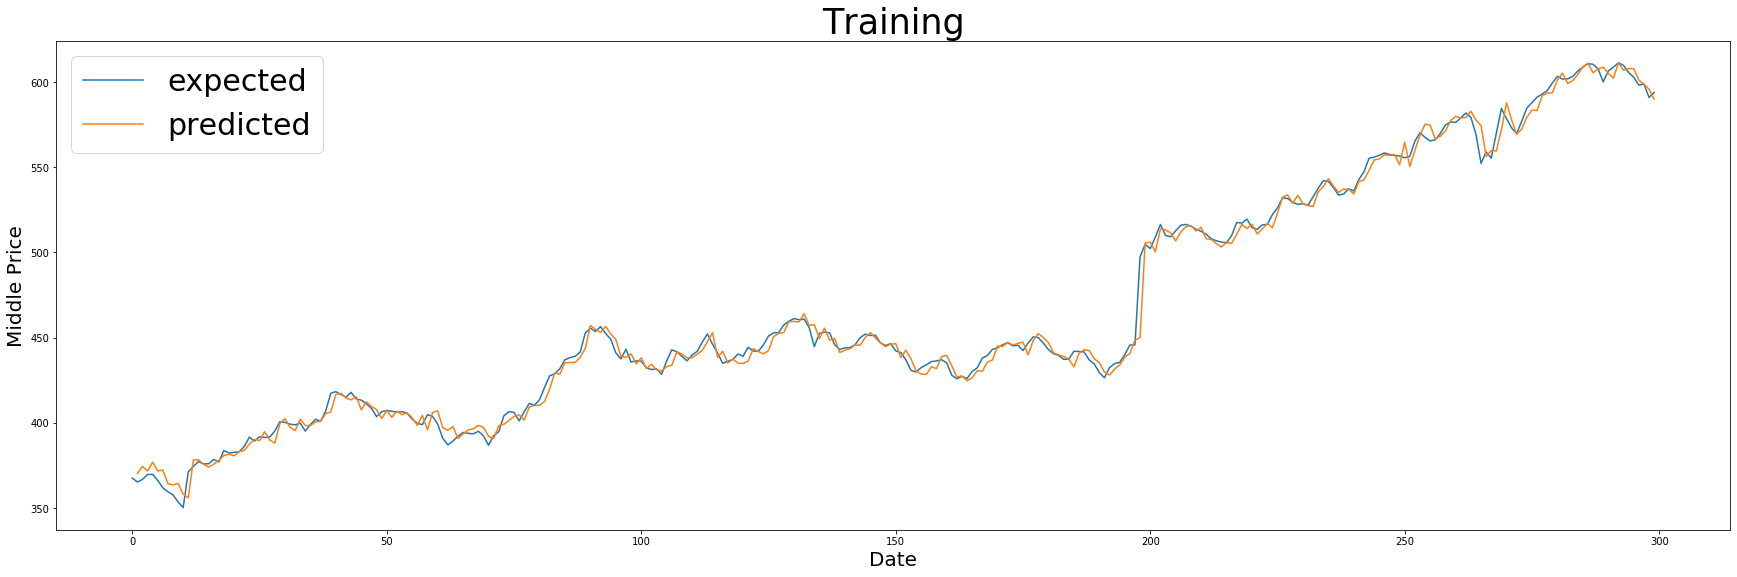

In [285]:
# Plot training data with known
plt.figure(figsize = (30,9))
plt.plot(range(df[:300].shape[0]), df[:300]['Middle'], label='expected')
plt.plot(range(len(news_trn_res)), news_trn_res, label='predicted')
plt.title('Training', fontsize=35)
plt.ylabel('Middle Price', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

In [286]:
news_val_res = getPredictions(model, validation_data_scaled, valX, 'Middle', sc, look_back=look_back)

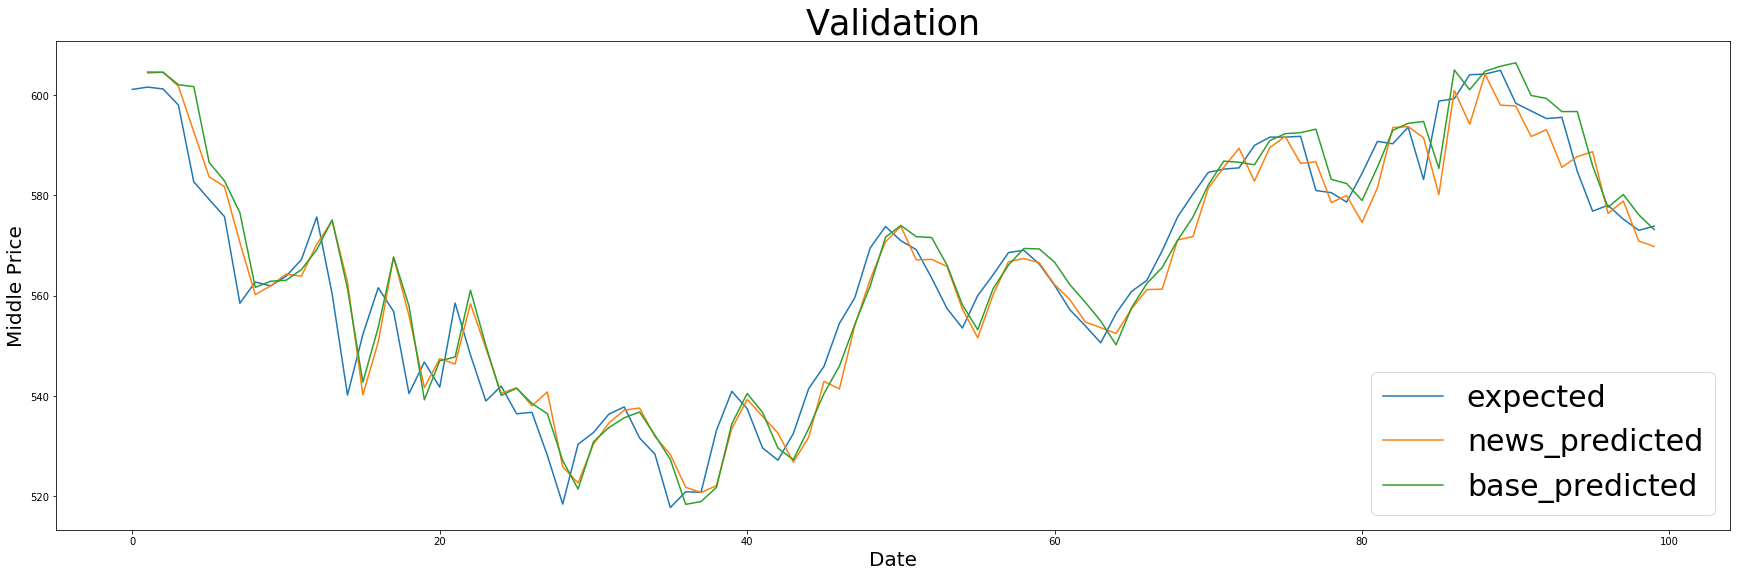

In [287]:
# Plot validation data with known
plt.figure(figsize = (30,9))
plt.plot(range(df[300:400].shape[0]), df[300:400]['Middle'], label='expected')
plt.plot(range(len(news_val_res)), news_val_res, label='news_predicted')
plt.plot(range(len(no_news_val_res)), no_news_val_res, label='base_predicted')
plt.title('Validation', fontsize=35)
plt.ylabel('Middle Price', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

In [288]:
total_expected = df[:400]
news_total_res = news_trn_res + news_val_res

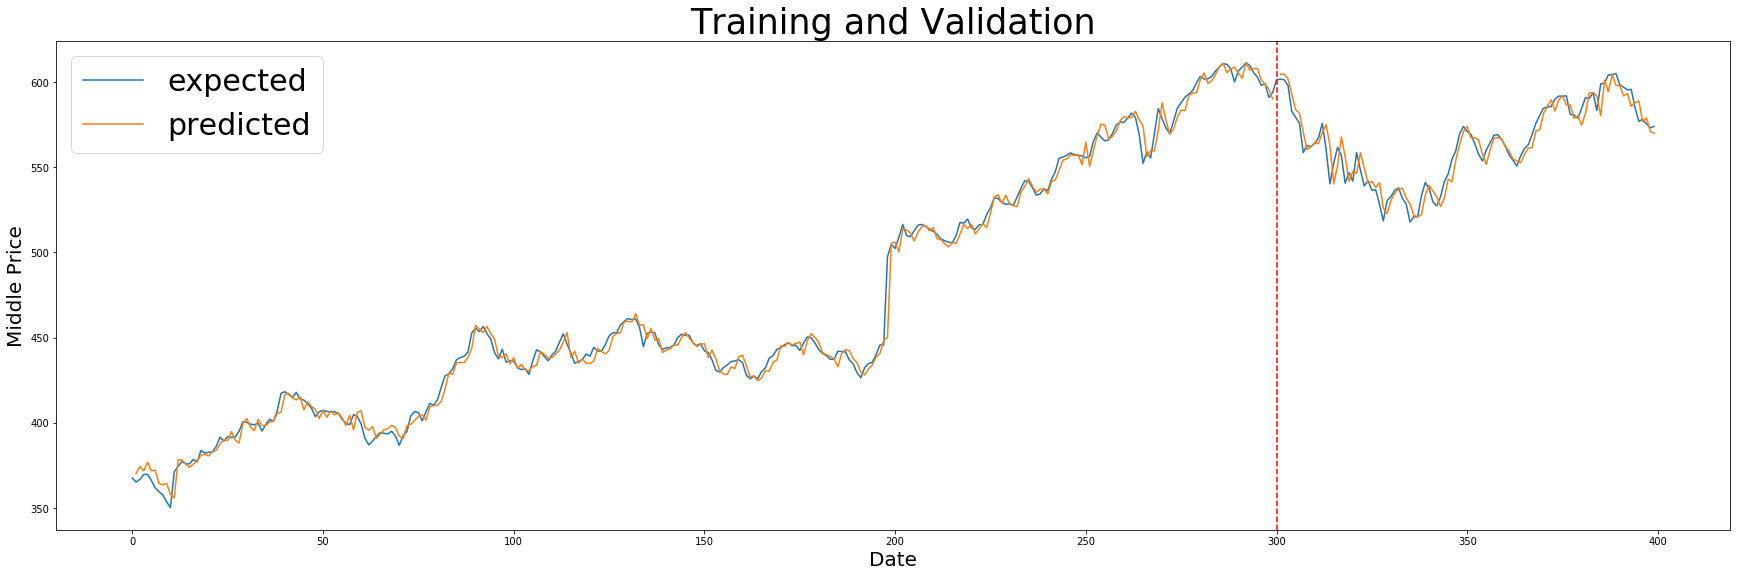

In [289]:
# Plot total data with known
plt.figure(figsize = (30,9))
plt.plot(range(total_expected.shape[0]), total_expected['Middle'], label='expected')
plt.plot(range(len(news_total_res)), news_total_res, label='predicted')
plt.title('Training and Validation', fontsize=35)
plt.ylabel('Middle Price', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.legend(prop={'size': 30})
plt.axvline(x=300, color='red', ls='--')
plt.show()

## Hyper Parameter Tuning (epochs, look_back, batch_size)<a id='sectionB4'></a>

In [290]:
test_epochs = list(range(1, 27, 3))
training_mse = []
validation_mse = []
training_r2 = []
validation_r2 = []

for ep in test_epochs:
    trainX, trainY = create_dataset(training_data_scaled, 'Middle', look_back=1)
    valX, valY = create_dataset(validation_data_scaled, 'Middle', look_back=1)
    num_feat = trainX.shape[2]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, num_feat))
    valX = np.reshape(valX, (valX.shape[0], 1, num_feat))
    
    model = Sequential()
    model.add(LSTM(32, input_shape=(1, num_feat)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    print('Fitting with {} number of epochs...'.format(ep))
    model.fit(trainX, trainY, validation_data=(valX, valY), epochs=ep, batch_size=4, verbose=0)
    trn_mse = get_mse(model, trainX, trainY)
    val_mse = get_mse(model, valX, valY)
    trn_r2 = get_r2(model, trainX, trainY)
    val_r2 = get_r2(model, valX, valY)

    print('Training MSE: {:.2f}'.format(trn_mse))
    print('Validation MSE: {:.2f}'.format(val_mse))
    print('Training r2: {:.2f}'.format(trn_r2))
    print('Validation r2: {:.2f}'.format(val_r2))
    
    training_mse.append(trn_mse)
    validation_mse.append(val_mse)
    training_r2.append(trn_r2)
    validation_r2.append(val_r2)
    print()

Fitting with 1 number of epochs...
Training MSE: 0.08
Validation MSE: 0.06
Training r2: 0.57
Validation r2: -6.29

Fitting with 4 number of epochs...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.98
Validation r2: 0.79

Fitting with 7 number of epochs...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.91

Fitting with 10 number of epochs...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.88

Fitting with 13 number of epochs...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.90

Fitting with 16 number of epochs...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.91

Fitting with 19 number of epochs...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.83

Fitting with 22 number of epochs...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.90

Fitting with 25 number of epochs...
Training MSE: 0.14
Validation MSE: 0.02
Traini

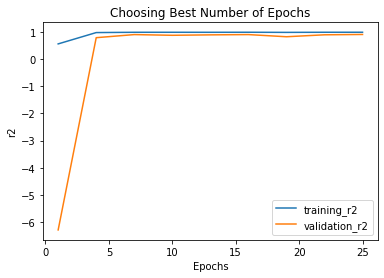

In [291]:
plt.plot(test_epochs, training_r2, label='training_r2')
plt.plot(test_epochs, validation_r2, label='validation_r2')
plt.title('Choosing Best Number of Epochs')
plt.ylabel('r2')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Doesn't seen to perform better after around 10-15 epochs, so we will keep it at 15

In [292]:
test_look_back = list(range(1, 6))
training_mse = []
validation_mse = []
training_r2 = []
validation_r2 = []

for lb in test_look_back:
    trainX, trainY = create_dataset(training_data_scaled, 'Middle', look_back=lb)
    valX, valY = create_dataset(validation_data_scaled, 'Middle', look_back=lb)
    num_feat = trainX.shape[2]
    trainX = np.reshape(trainX, (trainX.shape[0], lb, num_feat))
    valX = np.reshape(valX, (valX.shape[0], lb, num_feat))
    
    model = Sequential()
    model.add(LSTM(32, input_shape=(lb, num_feat)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    print('Fitting with {} number of previous days to predict...'.format(lb))
    model.fit(trainX, trainY, validation_data=(valX, valY), epochs=epochs, batch_size=4, verbose=0)
    trn_mse = get_mse(model, trainX, trainY)
    val_mse = get_mse(model, valX, valY)
    trn_r2 = get_r2(model, trainX, trainY)
    val_r2 = get_r2(model, valX, valY)

    print('Training MSE: {:.2f}'.format(trn_mse))
    print('Validation MSE: {:.2f}'.format(val_mse))
    print('Training r2: {:.2f}'.format(trn_r2))
    print('Validation r2: {:.2f}'.format(val_r2))
    
    training_mse.append(trn_mse)
    validation_mse.append(val_mse)
    training_r2.append(trn_r2)
    validation_r2.append(val_r2)
    print()

Fitting with 1 number of previous days to predict...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.89

Fitting with 2 number of previous days to predict...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.86

Fitting with 3 number of previous days to predict...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.79

Fitting with 4 number of previous days to predict...
Training MSE: 0.14
Validation MSE: 0.01
Training r2: 0.99
Validation r2: 0.72

Fitting with 5 number of previous days to predict...
Training MSE: 0.14
Validation MSE: 0.01
Training r2: 0.99
Validation r2: 0.70



Interestingly, even though MSE doesn't change, r2 significantly decreases with more lookback days. MSE is still the best loss function to compile this model, but note that a different metric seems to be more useful in analyzing this model. Due to the relatively "small" data size, look_back=1 is the best choice.

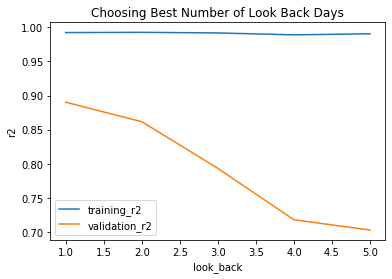

In [293]:
plt.plot(test_look_back, training_r2, label='training_r2')
plt.plot(test_look_back, validation_r2, label='validation_r2')
plt.title('Choosing Best Number of Look Back Days')
plt.ylabel('r2')
plt.xlabel('look_back')
plt.legend()
plt.show()

In [294]:
test_batch_size = [2, 4, 8, 16, 32, 64]
models = []
training_mse = []
validation_mse = []
training_r2 = []
validation_r2 = []

for batch_size in test_batch_size:
    trainX, trainY = create_dataset(training_data_scaled, 'Middle', look_back=1)
    valX, valY = create_dataset(validation_data_scaled, 'Middle', look_back=1)
    num_feat = trainX.shape[2]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, num_feat))
    valX = np.reshape(valX, (valX.shape[0], 1, num_feat))
    
    model = Sequential()
    model.add(LSTM(32, input_shape=(1, num_feat)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    print('Fitting with {} as batch size...'.format(batch_size))
    model.fit(trainX, trainY, validation_data=(valX, valY), epochs=epochs, batch_size=batch_size, verbose=0)
    models.append(model)
    
    trn_mse = get_mse(model, trainX, trainY)
    val_mse = get_mse(model, valX, valY)
    trn_r2 = get_r2(model, trainX, trainY)
    val_r2 = get_r2(model, valX, valY)

    print('Training MSE: {:.2f}'.format(trn_mse))
    print('Validation MSE: {:.2f}'.format(val_mse))
    print('Training r2: {:.2f}'.format(trn_r2))
    print('Validation r2: {:.2f}'.format(val_r2))
    
    training_mse.append(trn_mse)
    validation_mse.append(val_mse)
    training_r2.append(trn_r2)
    validation_r2.append(val_r2)
    print()

Fitting with 2 as batch size...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.89

Fitting with 4 as batch size...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.92

Fitting with 8 as batch size...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.89

Fitting with 16 as batch size...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.99
Validation r2: 0.86

Fitting with 32 as batch size...
Training MSE: 0.14
Validation MSE: 0.02
Training r2: 0.98
Validation r2: 0.78

Fitting with 64 as batch size...
Training MSE: 0.09
Validation MSE: 0.05
Training r2: 0.72
Validation r2: -4.03



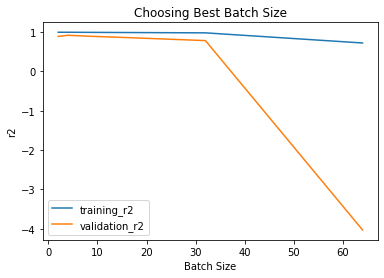

In [295]:
plt.plot(test_batch_size, training_r2, label='training_r2')
plt.plot(test_batch_size, validation_r2, label='validation_r2')
plt.title('Choosing Best Batch Size')
plt.ylabel('r2')
plt.xlabel('Batch Size')
plt.legend()
plt.show()

# The Best Model and Testing!<a id='sectionC'></a>
- Seems with news, model preforms a little better
- Best number of lookback days is 1
- Best batch size is 2-8, we'll go with 4

In [296]:
best_model = models[1]
news_tst_results = getPredictions(best_model, testing_data_scaled, testX, 'Middle', sc, look_back=1)

In [297]:
print('Testing MSE: {:.2f}'.format(get_mse(best_model, testX, testY)))
print('Testing r2: {:.2f}'.format(get_r2(best_model, testX, testY)))

Testing MSE: 0.02
Testing r2: 0.95


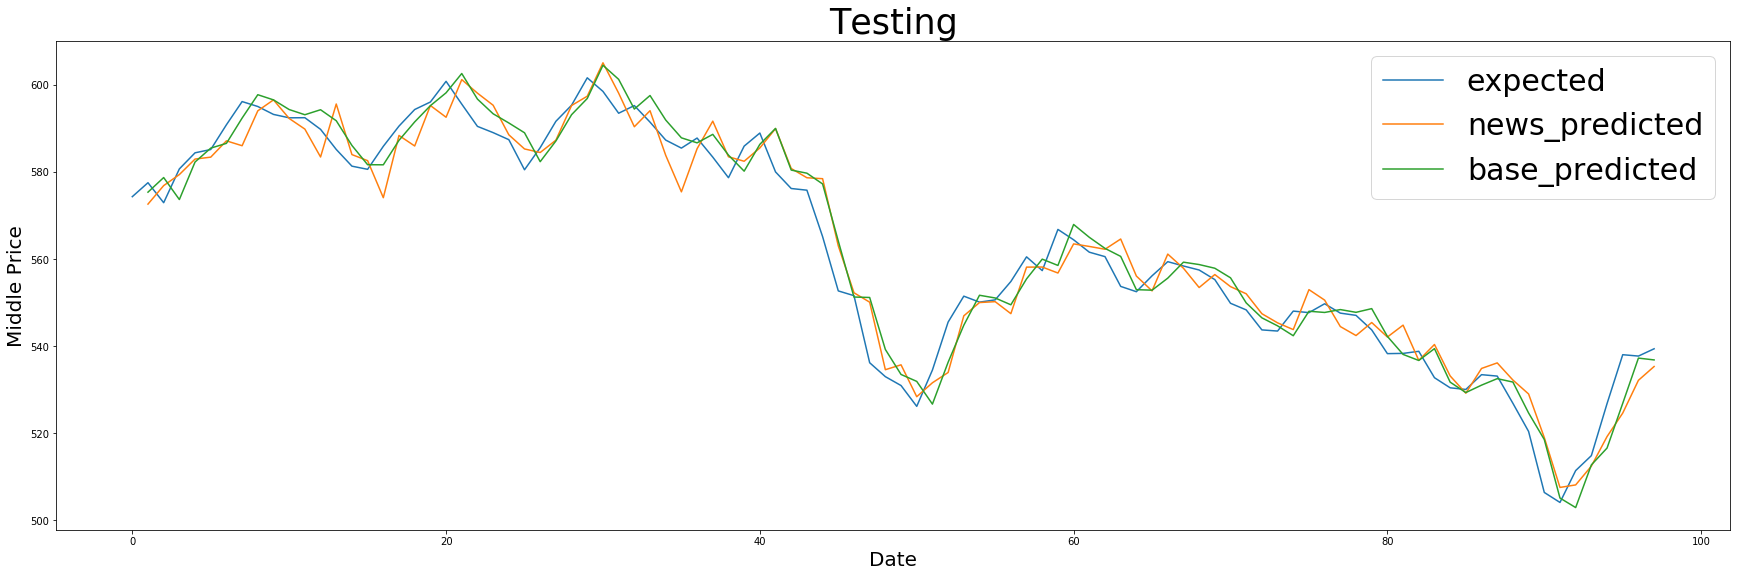

In [298]:
# Plot testing data with known
plt.figure(figsize = (30,9))
plt.plot(range(df[400:].shape[0]), df[400:]['Middle'], label='expected')
plt.plot(range(len(news_tst_results)), news_tst_results, label='news_predicted')
plt.plot(range(len(no_news_tst_res)), no_news_tst_res, label='base_predicted')
plt.title('Testing', fontsize=35)
plt.ylabel('Middle Price', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.legend(prop={'size': 30})
plt.show()